In [1]:
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline
import time
import seaborn as sns
import math

In [2]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, MaxAbsScaler

In [3]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [4]:
import unidecode
from unidecode import unidecode
import requests

In [5]:
import pandas as pd
import datetime
%matplotlib inline
from dateutil.parser import parse

In [6]:
# from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys

In [7]:
driver = webdriver.Chrome()

In [8]:
driver.get('https://www.google.com/flights/explore/')

In [9]:
def scrape_data(start_date, from_place, to_place, city_name):
    to_input = driver.find_element_by_xpath('//*[@id="root"]/div[3]/div[3]/div/div[4]/div/div')
    to_input.click()
    to_action = ActionChains(driver)
    to_action.send_keys(to_place)
    to_action.send_keys(Keys.ENTER)
    to_action.perform()
    
    from_input = driver.find_element_by_xpath('//*[@id="root"]/div[3]/div[3]/div/div[2]/div/div')
    from_input.click()
    from_action = ActionChains(driver)
    from_action.send_keys(from_place)
    from_action.send_keys(Keys.ENTER)
    from_action.perform() 
    
    time.sleep(5)
    current_url = driver.current_url
    split_url = current_url.split('2017')
    new_url = split_url[0] + start_date
    driver.get(new_url)    
    
    time.sleep(5)
    results = driver.find_elements_by_class_name('LJTSM3-v-c')
    

    result_names = []
    for i in range(len(results)):
        result_names.append(results[i].text)

    cities = []
    for city in result_names:
        name = city.split(',')
        cities.append(unidecode(name[0]))
    
    lower_case = [x.lower() for x in cities]
    if city_name.lower() in lower_case:
        city_index = lower_case.index(city_name.lower())
    
    time.sleep(2)
    
    box_class = driver.find_elements_by_class_name("LJTSM3-v-m")
    test = box_class[city_index]
    bars = test.find_elements_by_class_name('LJTSM3-w-x')

    time.sleep(1)

    data = []

    for bar in bars:
        ActionChains(driver).move_to_element(bar).perform()
        time.sleep(0.00001)
        data.append((test.find_element_by_class_name('LJTSM3-w-k').find_elements_by_tag_name('div')[0].text,
           test.find_element_by_class_name('LJTSM3-w-k').find_elements_by_tag_name('div')[1].text))

    time.sleep(2)

    d = data[0]
    clean_data = [(float(d[0].replace('$', '').replace(',', '')), (parse(d[1].split('-')[0].strip()) - datetime.datetime(2017,4,4,0,0)).days)
                      for d in data]

    time.sleep(3)

    df = pd.DataFrame(clean_data, columns=['Price','Start_Date'])
    return df


In [10]:
df = scrape_data('2017-04-16','London','India','New Delhi')

In [11]:
df

,Price,Start_Date
0,600.0,12
1,575.0,13
2,846.0,14
3,726.0,15
4,691.0,16
5,697.0,17
6,697.0,18
7,514.0,19
8,514.0,20
9,538.0,21


In [12]:
df["Price"][9]= 420

C:\Users\ajain\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [13]:
df

,Price,Start_Date
0,600.0,12
1,575.0,13
2,846.0,14
3,726.0,15
4,691.0,16
5,697.0,17
6,697.0,18
7,514.0,19
8,514.0,20
9,420.0,21


In [38]:
#Task2

In [43]:
def scrape_data_90(start_date, from_place, to_place, city_name):
    
    to_input = driver.find_element_by_xpath('//*[@id="root"]/div[3]/div[3]/div/div[4]/div/div')
    to_input.click()
    to_action = ActionChains(driver)
    to_action.send_keys(to_place)
    to_action.send_keys(Keys.ENTER)
    to_action.perform()
    
    from_input = driver.find_element_by_xpath('//*[@id="root"]/div[3]/div[3]/div/div[2]/div/div')
    from_input.click()
    from_action = ActionChains(driver)
    from_action.send_keys(from_place)
    from_action.send_keys(Keys.ENTER)
    from_action.perform() 
    
    time.sleep(5)
    current_url = driver.current_url
    split_url = current_url.split('2017')
    new_url = split_url[0] + start_date
    driver.get(new_url)    
    
    time.sleep(5)
    results = driver.find_elements_by_class_name('LJTSM3-v-c')
    

    result_names = []
    for i in range(len(results)):
        result_names.append(results[i].text)

    cities = []
    for city in result_names:
        name = city.split(',')
        cities.append(unidecode(name[0]))
    
    lower_case = [x.lower() for x in cities]
    if city_name.lower() in lower_case:
        city_index = lower_case.index(city_name.lower())
    
    time.sleep(2)
    
    box_class = driver.find_elements_by_class_name("LJTSM3-v-m")
    test = box_class[city_index]
    bars = test.find_elements_by_class_name('LJTSM3-w-x')

    time.sleep(1)
    data_90 = []

    for bar in bars:
        ActionChains(driver).move_to_element(bar).perform()
        time.sleep(0.00001)
        data_90.append((test.find_element_by_class_name('LJTSM3-w-k').find_elements_by_tag_name('div')[0].text,
           test.find_element_by_class_name('LJTSM3-w-k').find_elements_by_tag_name('div')[1].text))
    
    move_bars_input = driver.find_element_by_xpath('//*[@id="root"]/div[3]/div[4]/div/div[2]/div[1]/div/div[2]/div[2]/div/div[2]/div[5]')
    move_bars_input.click()
    move_bars_input = ActionChains(driver)
    move_bars_input.perform()
    
    time.sleep(5)
    results = driver.find_elements_by_class_name('LJTSM3-v-c')
    result_names = []
    for i in range(len(results)):
        result_names.append(results[i].text)

    cities = []
    for city in result_names:
        name = city.split(',')
        cities.append(unidecode(name[0]))
        
    lower_case = [x.lower() for x in cities]
    if city_name.lower() in lower_case:
        city_index = lower_case.index(city_name.lower())
        
    time.sleep(2)
        
    box_class = driver.find_elements_by_class_name("LJTSM3-v-m")
    test = box_class[city_index]
    bars = test.find_elements_by_class_name('LJTSM3-w-x')
    
    next_data= []
    for bar in bars:
        ActionChains(driver).move_to_element(bar).perform()
        time.sleep(0.00001)
        next_data.append((test.find_element_by_class_name('LJTSM3-w-k').find_elements_by_tag_name('div')[0].text,
           test.find_element_by_class_name('LJTSM3-w-k').find_elements_by_tag_name('div')[1].text))
    
    time.sleep(3)
    for element in next_data:
        if element not in data_90:
            data_90.append(element)
            
    d = data_90[0]
    clean_data = [(float(d[0].replace('$', '').replace(',', '')), (parse(d[1].split('-')[0].strip()) - datetime.datetime(2017,4,4,0,0)).days)
                      for d in data_90]
    
    df_90 = pd.DataFrame(clean_data, columns=['Price','Start_Date'])
    return df_90   
    

In [46]:
# scrape_data_90('2017-04-20','London','Europe','Dublin')

,Price,Start_Date
0,640.0,16
1,872.0,17
2,770.0,18
3,440.0,19
4,801.0,20
5,572.0,21
6,547.0,22
7,547.0,23
8,547.0,24
9,440.0,25


In [101]:
# df = scrape_data_90('2017-04-16','London','California','San Jose')

In [102]:
# df

,Price,Start_Date
0,1290.0,12
1,1278.0,13
2,1187.0,14
3,1190.0,15
4,1155.0,16
5,1224.0,17
6,1198.0,18
7,1315.0,19
8,1004.0,20
9,904.0,21


In [103]:
#Task 3 - IQR

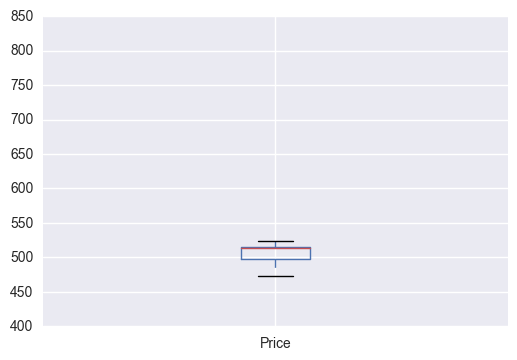

In [14]:
df['Price'].plot.box()

In [15]:
import numpy as np

def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [16]:
outliers_iqr(df['Price'])

(array([ 0,  1,  2,  3,  4,  5,  6,  9, 10], dtype=int64),)

In [17]:
q75, q25 = np.percentile(df.Price, [75 ,25])
iqr = q75 - q25
 
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)

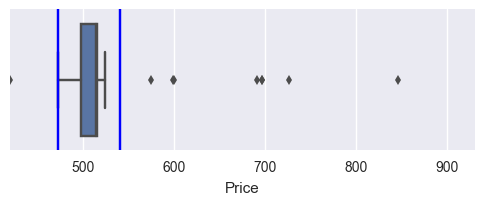

In [18]:
i = 'Price'
 
# plt.figure(figsize=(10,8))
# plt.subplot(211)
# plt.xlim(df[i].min(), df[i].max()*1.1)
# plt.axvline(x=min)
# plt.axvline(x=max)
 
ax = df[i].plot(kind='kde')
 
plt.subplot(212)
plt.xlim(df[i].min(), df[i].max()*1.1)
sns.boxplot(x=df[i])
plt.axvline(x=min)
plt.axvline(x=max)

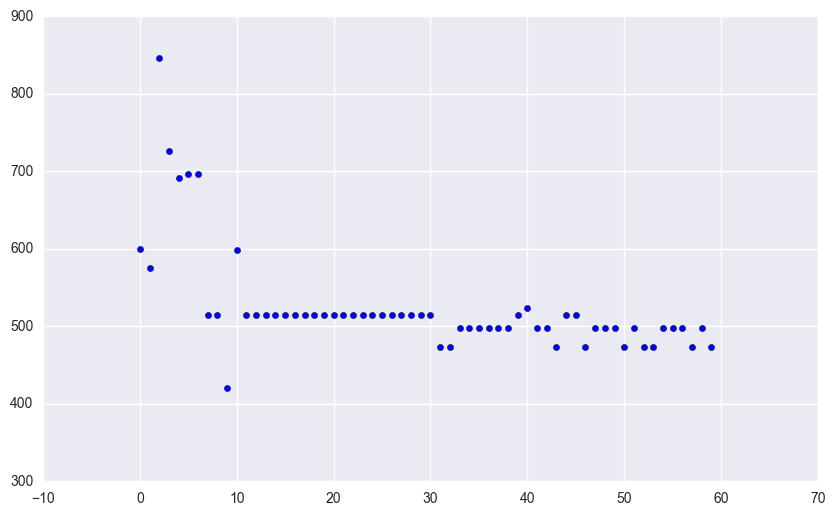

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(np.arange(len(df['Price'])), df['Price'])

In [20]:
px = [x for x in df['Price']]
ff = pd.DataFrame(px, columns=['Price_of_flight']).reset_index()

C:\Users\ajain\Anaconda2\lib\site-packages\matplotlib\lines.py:1145: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


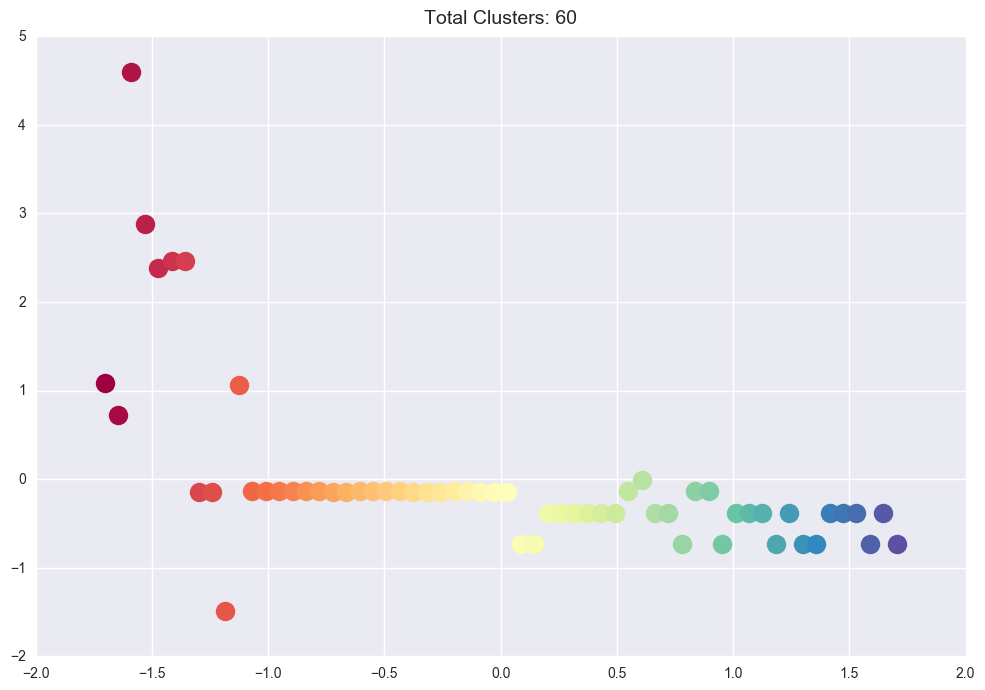

In [21]:
X = StandardScaler().fit_transform(ff) 
db = DBSCAN(eps = 0.01, min_samples = 1).fit(X)

labels = db.labels_
clusters = len(set(labels))
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

plt.subplots(figsize = (12,8))

for k,c in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor = c, markeredgecolor = 'k',markersize = 14)
    
    
plt.title('Total Clusters: {}'.format(clusters), fontsize = 14, y = 1.01)   

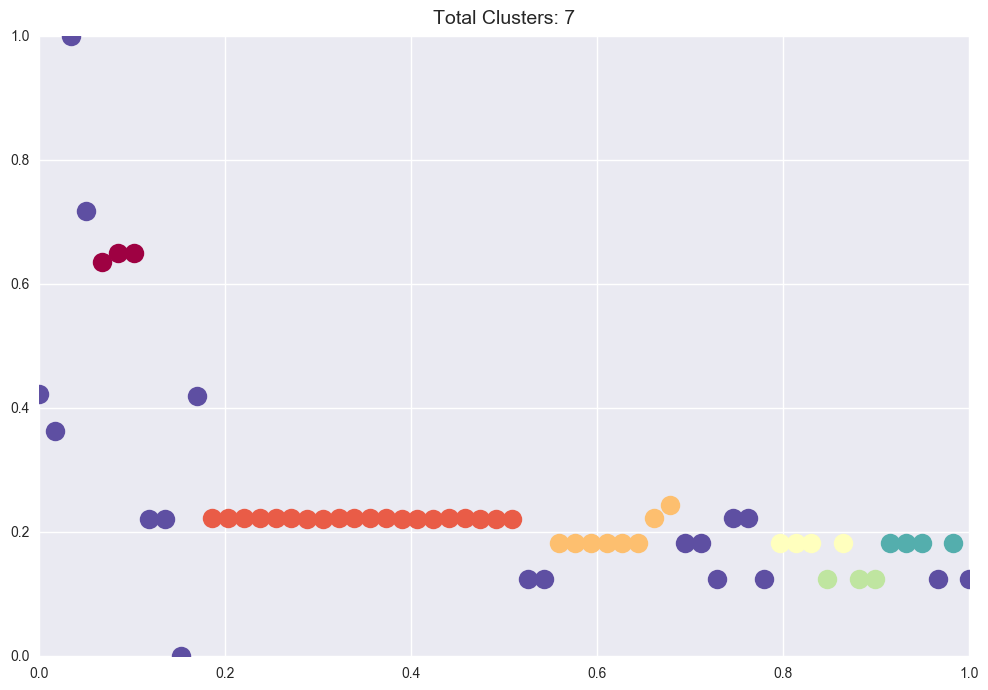

In [28]:
X = MinMaxScaler().fit_transform(ff) 
db = DBSCAN(eps = 0.05, min_samples = 3).fit(X)

labels = db.labels_
clusters = len(set(labels))
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

plt.subplots(figsize = (12,8))

for k,c in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor = c, markeredgecolor = 'k',markersize = 14)
    
    
plt.title('Total Clusters: {}'.format(clusters), fontsize = 14, y = 1.01)   

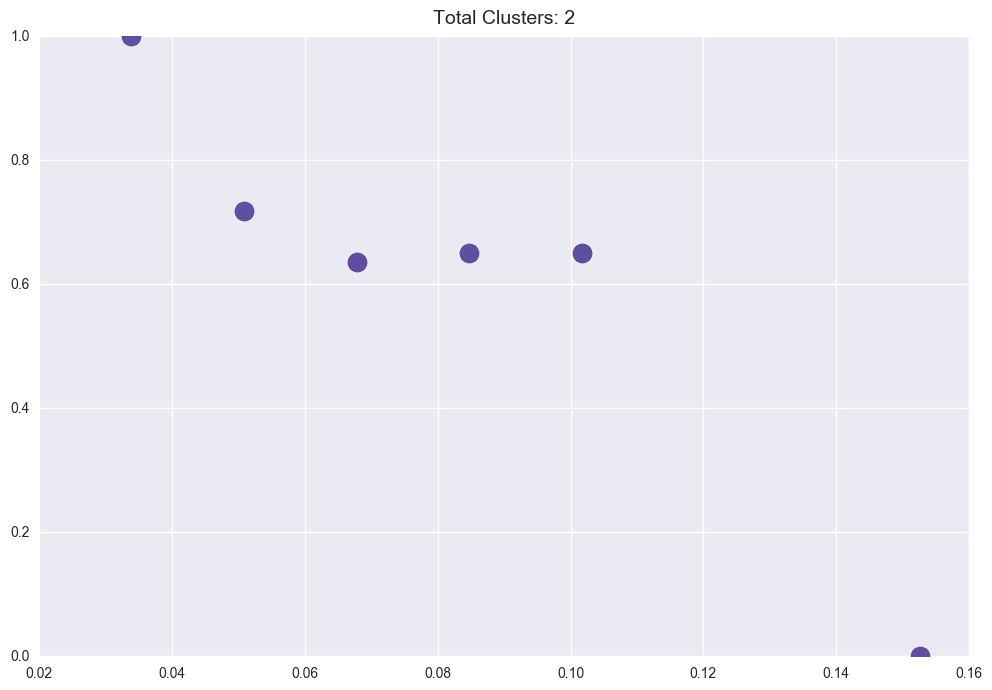

In [41]:
db = DBSCAN(eps=0.2, min_samples=5).fit(X)

# shamelessly copied code below ;)
labels = db.labels_
clusters = len(set(labels))
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
 
plt.subplots(figsize=(12,8))
 
for k, c in zip(unique_labels, colors):
    class_member_mask = (labels == -1)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=c,
            markeredgecolor='k', markersize=14)
 
plt.title("Total Clusters: {}".format(clusters), fontsize=14,
        y=1.01)

In [42]:
labels

array([ 0,  0, -1, -1, -1, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

In [44]:
class_member_mask = (labels == -1)
xy = X[class_member_mask]
xy[0]

array([ 0.03389831,  1.        ])

In [31]:
cluster_means

[array([ 0.08474576,  0.64553991]),
 array([ 0.34745763,  0.22206573]),
 array([ 0.61864407,  0.19571596]),
 array([ 0.82627119,  0.18309859]),
 array([ 0.87570621,  0.12441315]),
 array([ 0.94491525,  0.18309859])]

In [46]:
dist = [euclidean(xy[0], cm) for cm in cluster_means]
print "Euclidean distance: {}".format(dist)

Euclidean distance: [0.3580885674137177, 0.8387497722527374, 0.9943844427992532, 1.138060936082531, 1.214616357693265, 1.2236338475099282]


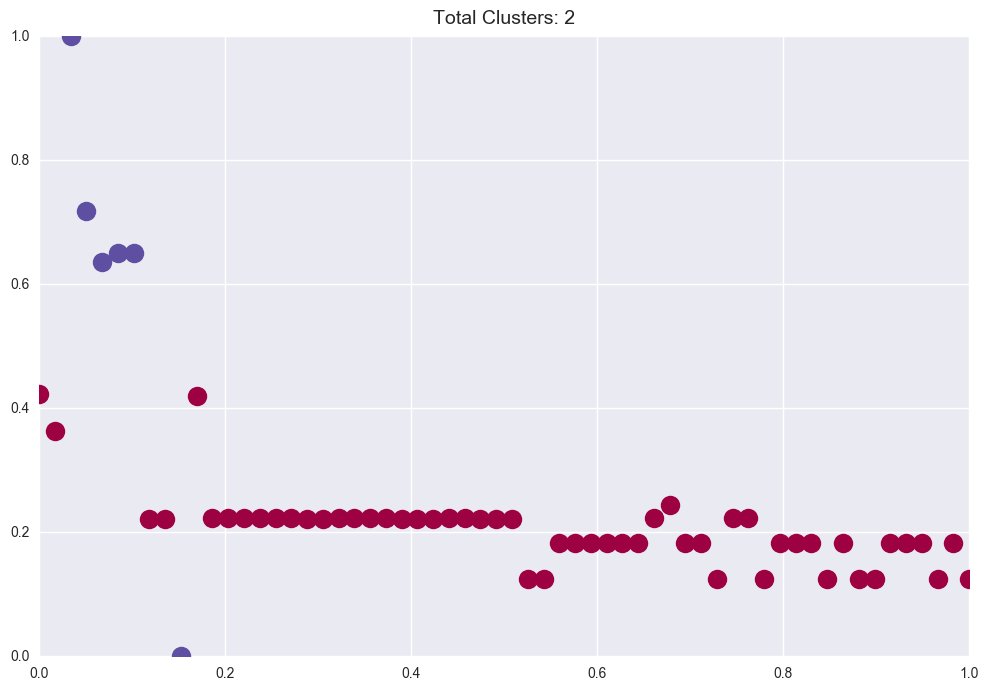

In [24]:
db = DBSCAN(eps=0.2, min_samples=5).fit(X)

# shamelessly copied code below ;)
labels = db.labels_
clusters = len(set(labels))
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
 
plt.subplots(figsize=(12,8))
 
for k, c in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=c,
            markeredgecolor='k', markersize=14)
 
plt.title("Total Clusters: {}".format(clusters), fontsize=14,
        y=1.01)

In [33]:
cluster_means

[array([ 0.08474576,  0.64553991]),
 array([ 0.34745763,  0.22206573]),
 array([ 0.61864407,  0.19571596]),
 array([ 0.82627119,  0.18309859]),
 array([ 0.87570621,  0.12441315]),
 array([ 0.94491525,  0.18309859])]

In [225]:
class_member_mask

array([False, False,  True,  True,  True,  True,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False], dtype=bool)

In [194]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [195]:
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min

In [197]:
X_std

array([[ 0.        ,  0.42253521],
       [ 0.01694915,  0.36384977],
       [ 0.03389831,  1.        ],
       [ 0.05084746,  0.72535211],
       [ 0.06779661,  0.63849765],
       [ 0.08474576,  0.66666667],
       [ 0.10169492,  0.65023474],
       [ 0.11864407,  0.22065728],
       [ 0.13559322,  0.22065728],
       [ 0.15254237,  0.        ],
       [ 0.16949153,  0.42018779],
       [ 0.18644068,  0.22300469],
       [ 0.20338983,  0.22300469],
       [ 0.22033898,  0.22300469],
       [ 0.23728814,  0.22300469],
       [ 0.25423729,  0.22300469],
       [ 0.27118644,  0.22300469],
       [ 0.28813559,  0.22065728],
       [ 0.30508475,  0.22065728],
       [ 0.3220339 ,  0.22300469],
       [ 0.33898305,  0.22300469],
       [ 0.3559322 ,  0.22300469],
       [ 0.37288136,  0.22300469],
       [ 0.38983051,  0.22065728],
       [ 0.40677966,  0.22065728],
       [ 0.42372881,  0.22065728],
       [ 0.44067797,  0.22300469],
       [ 0.45762712,  0.22300469],
       [ 0.47457627,

In [196]:
X_scaled

array([[ 472.5       ,  501.23239437],
       [ 473.65254237,  497.24178404],
       [ 474.80508475,  540.5       ],
       [ 475.95762712,  521.82394366],
       [ 477.11016949,  515.91784038],
       [ 478.26271186,  517.83333333],
       [ 479.41525424,  516.71596244],
       [ 480.56779661,  487.50469484],
       [ 481.72033898,  487.50469484],
       [ 482.87288136,  472.5       ],
       [ 484.02542373,  501.07276995],
       [ 485.1779661 ,  487.66431925],
       [ 486.33050847,  487.66431925],
       [ 487.48305085,  487.66431925],
       [ 488.63559322,  487.66431925],
       [ 489.78813559,  487.66431925],
       [ 490.94067797,  487.66431925],
       [ 492.09322034,  487.50469484],
       [ 493.24576271,  487.50469484],
       [ 494.39830508,  487.66431925],
       [ 495.55084746,  487.66431925],
       [ 496.70338983,  487.66431925],
       [ 497.8559322 ,  487.66431925],
       [ 499.00847458,  487.50469484],
       [ 500.16101695,  487.50469484],
       [ 501.31355932,  4

In [29]:
from scipy.spatial.distance import euclidean, chebyshev, cityblock

# get the distances to each clusters
labels = db.labels_
lbls = np.unique(db.labels_)
print "Cluster labels: {}".format(np.unique(lbls))

cluster_means = [np.mean(X[labels==num, :], axis=0) for num in range(lbls[-1] + 1)]
print "Cluster Means: {}".format(cluster_means)

noise_point = X[30, :]

# euclidean
dist = [euclidean(noise_point, cm) for cm in cluster_means]
print "Euclidean distance: {}".format(dist)

# chebyshev
# dist = [chebyshev(noise_point, cm) for cm in cluster_means]
# print "Chebysev distance: {}".format(dist)

# cityblock
# dist = [cityblock(noise_point, cm) for cm in cluster_means]
# print "Cityblock (Manhattan) distance: {}".format(dist)

Cluster labels: [-1  0  1  2  3  4  5]
Cluster Means: [array([ 0.08474576,  0.64553991]), array([ 0.34745763,  0.22206573]), array([ 0.61864407,  0.19571596]), array([ 0.82627119,  0.18309859]), array([ 0.87570621,  0.12441315]), array([ 0.94491525,  0.18309859])]
Euclidean distance: [0.6000594603521395, 0.16102310904891465, 0.1129574523201171, 0.32000834409066914, 0.37963404627987596, 0.43805378692113006]


In [32]:
print cluster_means


[array([ 0.08474576,  0.64553991]), array([ 0.34745763,  0.22206573]), array([ 0.61864407,  0.19571596]), array([ 0.82627119,  0.18309859]), array([ 0.87570621,  0.12441315]), array([ 0.94491525,  0.18309859])]


In [208]:
# let's create some helper functions
def calculate_cluster_means(X, labels):
    lbls = np.unique(labels)
    print "Cluster labels: {}".format(np.unique(lbls))

    cluster_means = [np.mean(X[labels==num, :], axis=0) for num in range(lbls[-1] + 1)]
    print "Cluster Means: {}".format(cluster_means)
    return cluster_means
    
def print_3_distances(noise_point, cluster_means):
    # euclidean
    dist = [euclidean(noise_point, cm) for cm in cluster_means]
    print "Euclidean distance: {}".format(dist)

#     # chebyshev
#     dist = [chebyshev(noise_point, cm) for cm in cluster_means]
#     print "Chebysev distance: {}".format(dist)

#     # cityblock
#     dist = [cityblock(noise_point, cm) for cm in cluster_means]
#     print "Cityblock (Manhattan) distance: {}".format(dist)
    
def plot_the_clusters(X, dbscan_model, noise_point=None):
    labels = dbscan_model.labels_
    clusters = len(set(labels))
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

    plt.subplots(figsize=(12,8))

    for k, c in zip(unique_labels, colors):
        class_member_mask = (labels == k)
        xy = X[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=c,
                markeredgecolor='k', markersize=14)
        
    if noise_point is not None:
        plt.plot(noise_point[0], noise_point[1], 'xr')

    plt.title("Total Clusters: {}".format(clusters), fontsize=14, y=1.01)
    
def do_yo_thang(X, dbscan_model, noise_point):
    cluster_means = calculate_cluster_means(X, dbscan_model.labels_)
    print_3_distances(noise_point, cluster_means)
    plot_the_clusters(X, dbscan_model, noise_point)

In [207]:
calculate_cluster_means(X, labels)

Cluster labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59]
Cluster Means: [array([-1.7034199 ,  1.07079086]), array([-1.64567685,  0.7157541 ]), array([-1.5879338 ,  4.56435253]), array([-1.53019075,  2.90278052]), array([-1.47244771,  2.37732612]), array([-1.41470466,  2.54774376]), array([-1.35696161,  2.44833347]), array([-1.29921857, -0.15053558]), array([-1.24147552, -0.15053558]), array([-1.18373247, -1.48547379]), array([-1.12598942,  1.05658939]), array([-1.06824638, -0.13633411]), array([-1.01050333, -0.13633411]), array([-0.95276028, -0.13633411]), array([-0.89501723, -0.13633411]), array([-0.83727419, -0.13633411]), array([-0.77953114, -0.13633411]), array([-0.72178809, -0.15053558]), array([-0.66404504, -0.15053558]), array([-0.606302  , -0.13633411]), array([-0.54855895, -0.13633411]), array([-0.4908159 , -0.13633411]), array([-0.4330

[array([-1.7034199 ,  1.07079086]),
 array([-1.64567685,  0.7157541 ]),
 array([-1.5879338 ,  4.56435253]),
 array([-1.53019075,  2.90278052]),
 array([-1.47244771,  2.37732612]),
 array([-1.41470466,  2.54774376]),
 array([-1.35696161,  2.44833347]),
 array([-1.29921857, -0.15053558]),
 array([-1.24147552, -0.15053558]),
 array([-1.18373247, -1.48547379]),
 array([-1.12598942,  1.05658939]),
 array([-1.06824638, -0.13633411]),
 array([-1.01050333, -0.13633411]),
 array([-0.95276028, -0.13633411]),
 array([-0.89501723, -0.13633411]),
 array([-0.83727419, -0.13633411]),
 array([-0.77953114, -0.13633411]),
 array([-0.72178809, -0.15053558]),
 array([-0.66404504, -0.15053558]),
 array([-0.606302  , -0.13633411]),
 array([-0.54855895, -0.13633411]),
 array([-0.4908159 , -0.13633411]),
 array([-0.43307286, -0.13633411]),
 array([-0.37532981, -0.15053558]),
 array([-0.31758676, -0.15053558]),
 array([-0.25984371, -0.15053558]),
 array([-0.20210067, -0.13633411]),
 array([-0.14435762, -0.1363

In [211]:
print_3_distances(noise_point, cluster_means)

Euclidean distance: [0.5486251241052915]


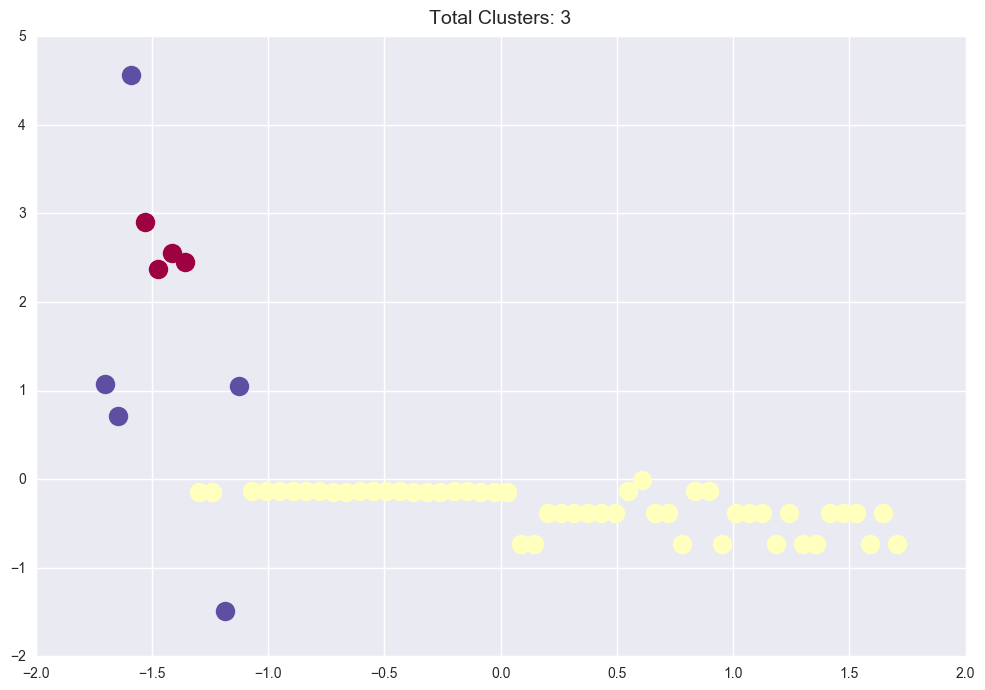

In [213]:
plot_the_clusters(X, db_ss, noise_point=None)

Cluster labels: [-1  0  1]
Cluster Means: [array([-1.44357618,  2.56904597]), array([ 0.25531485, -0.3176117 ])]
Euclidean distance: [3.092608294257651, 0.2814089702198971]


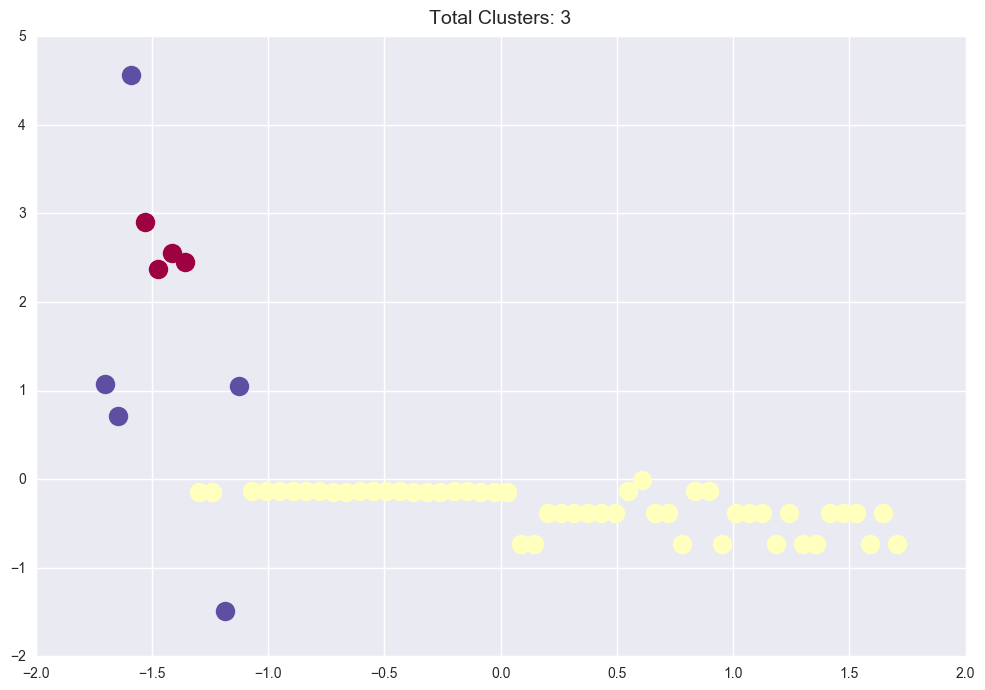

In [191]:
X_ss = StandardScaler().fit_transform(X)
db_ss = DBSCAN(eps=0.4, min_samples=3).fit(X_ss)
noise_point = X_ss[30, :]
do_yo_thang(X_ss, db_ss, noise_point)

In [202]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, MaxAbsScaler
from sklearn.cluster import DBSCAN

%matplotlib inline

In [206]:
def makeX(prices):
    return np.concatenate(df[Prices], axis=1)

prices_ss = StandardScaler().fit_transform(noise_point[:, None])
prices_rob = RobustScaler().fit_transform(noise_point[:, None])

days_mm4 = X_scaled
# MinMaxScaler(feature_range=(-4,4)).fit_transform(days[:, None])

X_ssmm4 = makeX(prices_rob)
db = DBSCAN(eps=0.6, min_samples=5).fit(X_ssmm4)
# show with X_ss again

noise_point = X_ssmm4[30, :]
do_yo_thang(X_ssmm4, db, noise_point)
for index, xy in enumerate(zip(days_mm4, prices_ss)):
    plt.annotate('{}: ({:0.2f}, {:0.2f})'.format(index, xy[0][0], xy[1][0]), xytext=(xy[0]-0.45, xy[1]-0.15), xy=xy)

NameError: global name 'Prices' is not defined

In [147]:
D = distance.squareform(distance.pdist(X))
S = np.max(D) - D
db = DBSCAN(eps=0.5 * np.max(D), min_samples=10).fit(S)

NameError: name 'distance' is not defined

In [74]:
# db = DBSCAN(eps=0.2, min_samples=5).fit(X)
# core_samples = db.core_sample_indices_
# labels = db.labels_
# n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# print n_clusters_


3


In [69]:
clusters = [X[labels == i] for i in xrange(n_clusters_)]

In [70]:
clusters

[array([[-1.25100281, -0.74339331],
        [-1.21251041, -0.74339331],
        [-1.17401802, -0.74339331],
        [-1.09703323, -0.74339331],
        [-1.05854084, -0.74339331],
        [-1.02004844, -0.74339331],
        [-0.98155605, -0.74339331],
        [-0.94306366, -0.74339331],
        [-0.90457126, -0.74339331],
        [-0.82758647, -0.74339331],
        [-0.78909408, -0.74339331],
        [-0.75060168, -0.74339331],
        [-0.71210929, -0.74339331],
        [-0.6736169 , -0.74339331],
        [-0.6351245 , -0.74339331],
        [-0.55813971, -0.74339331],
        [-0.51964732, -0.74339331],
        [-0.48115493, -0.74339331],
        [-0.44266253, -0.74339331],
        [-0.40417014, -0.74339331],
        [-0.36567774, -0.74339331]]), array([[ 0.0192462 , -0.36630975],
        [ 0.05773859, -0.36630975],
        [ 0.09623099, -0.36630975],
        [ 0.13472338, -0.36630975],
        [ 0.17321577, -0.36630975],
        [ 0.32718535, -0.36630975],
        [ 0.36567774, -0.36

In [71]:
outliers = X[labels == -1]

In [72]:
outliers

array([[-1.71291154, -0.36630975],
       [-1.67441914,  5.50542003],
       [-1.63592675,  4.58964566],
       [-1.59743435,  2.70422784],
       [-1.55894196,  1.41136991],
       [-1.52044957, -0.36630975],
       [-1.48195717, -0.36630975],
       [-1.44346478, -0.52791699],
       [-1.40497238,  2.70422784],
       [-1.36647999, -0.09696434],
       [-1.3279876 , -0.52791699],
       [-1.2894952 , -0.36630975],
       [-1.13552563,  0.3339883 ],
       [-0.86607887,  0.3339883 ],
       [-0.59663211, -0.36630975],
       [-0.32718535,  1.19589359],
       [-0.28869296, -0.36630975],
       [-0.25020056,  0.71107186],
       [-0.21170817,  0.01077382],
       [-0.17321577,  0.71107186],
       [-0.13472338,  0.01077382],
       [-0.09623099, -0.09696434],
       [-0.05773859,  0.54946462],
       [-0.0192462 , -0.09696434],
       [ 0.21170817,  0.17238106],
       [ 0.25020056, -0.09696434],
       [ 0.28869296, -0.09696434],
       [ 0.48115493,  0.17238106],
       [ 0.51964732,